# Multi Qubit Quantum Gates

## Importing necessary libraries

In [1]:
import qiskit
import numpy as np
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.visualization import plot_state_city # Density Matrix Plot
from qiskit.visualization import plot_state_qsphere # Used for Multi Qubit Visualization
from qiskit.visualization import plot_bloch_multivector # Plotting the Bloch Sphere for Single Qubits
from qiskit.visualization import plot_histogram # 2D Histogram
from math import pi, sqrt # pi = 3.14 and square root operation

#### Basic Qiskit Information

- **All qubits in Qiskit starts from the state |0> by default**
- **Qiskit uses little endian ordering system for both classical bit and quantum bit ordering. This means that for 3 qubits $q_0$, $q_1$ & $q_2$, the qiskit ordering is reversed as $q_2$, $q_1$ & $q_0$. Same is for classical bits as well.**

## Quantum CNOT/CX Gate

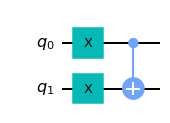

In [2]:
# CX-gate on |11> = |10> (|01> according to Qiskit ordering)
qc_cx = QuantumCircuit(2,name="qc")
qc_cx.x(0) # X Gate on 1st Qubit
qc_cx.x(1) # X Gate on 2nd Qubit
qc_cx.cx(0,1) # CX Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cx.draw('mpl')

### Density Matrix Plot for CNOT Gate


Quantum state is: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


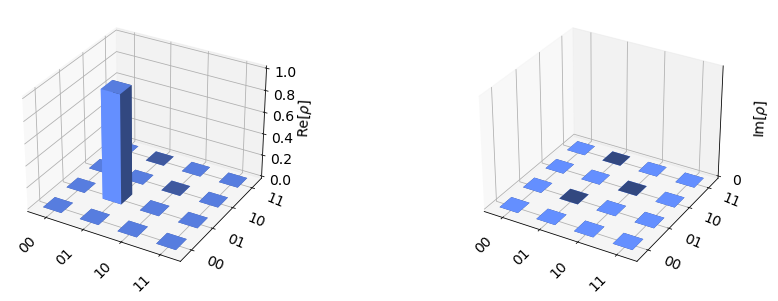

In [3]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit 
job_state = execute(qc_cx, simulator_state)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc_cx)
print("\nQuantum state is:",psi)

# Plot a Density Matrix Plot
plot_state_city(psi)

### QSphere Plot for CX Gate

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


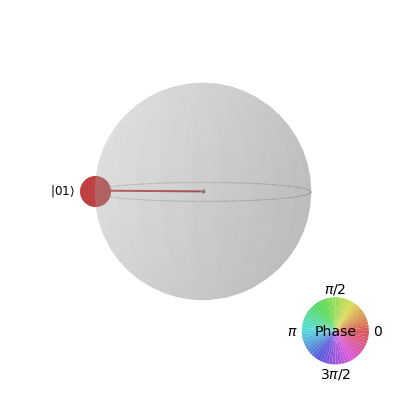

In [4]:
# Plot the QSphere
psi  = result_state.get_statevector(qc_cx)
plot_state_qsphere(psi)

### Unitary Operator for CNOT Gate

In [5]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
cx_unitary = execute(qc_cx, backend)
cx_unitary.result().get_unitary(qc_cx, decimals=3)

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

### Running CNOT Gate Circuit using QASM Simulator

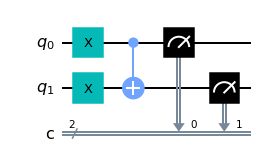

In [6]:
# CNOT with Measurement
qc_cx = QuantumCircuit(2,2,name="qc")
qc_cx.x(0) # X Gate on 1st Qubit
qc_cx.x(1) # X Gate on 2nd Qubit
qc_cx.cx(0,1) # CX Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cx.measure([0,1],[0,1])
qc_cx.draw('mpl')


Total counts are: {'01': 1000}


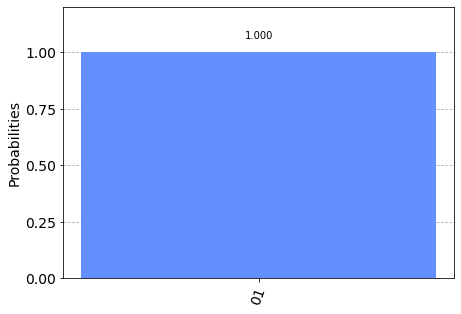

In [7]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_cx, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_cx)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## CNOT Gate using CZ and H Gates

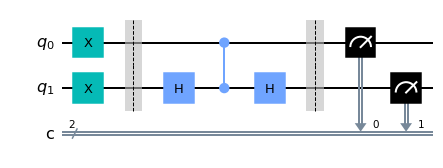

In [8]:
# CNOT with Measurement
qc_cx = QuantumCircuit(2,2,name="qc")
qc_cx.x(0) # X Gate on 1st Qubit
qc_cx.x(1) # X Gate on 2nd Qubit
qc_cx.barrier()
qc_cx.h(1) # H Gate on 2nd Qubit
qc_cx.cz(0,1) # CZ Gate
qc_cx.h(1) # H Gate on 2nd Qubit
qc_cx.barrier()
qc_cx.measure([0,1],[0,1])
qc_cx.draw('mpl')


Total counts are: {'01': 1000}


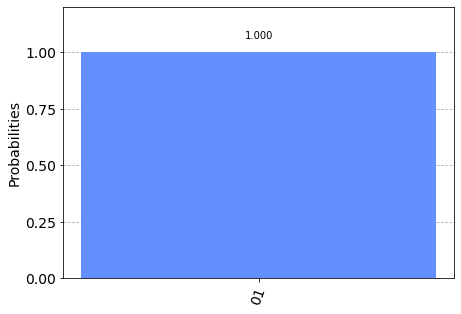

In [9]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_cx, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_cx)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Quantum CZ Gate

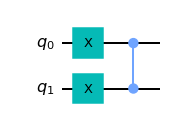

In [10]:
# CZ-gate on |11> = -|11> (|11> according to Qiskit ordering)
qc_cz = QuantumCircuit(2,name="qc")
qc_cz.x(0) # X Gate on 1st Qubit
qc_cz.x(1) # X Gate on 2nd Qubit
qc_cz.cz(0,1) # CZ Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cz.draw('mpl')

### Density Matrix Plot for CZ Gate


Quantum state is: [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]


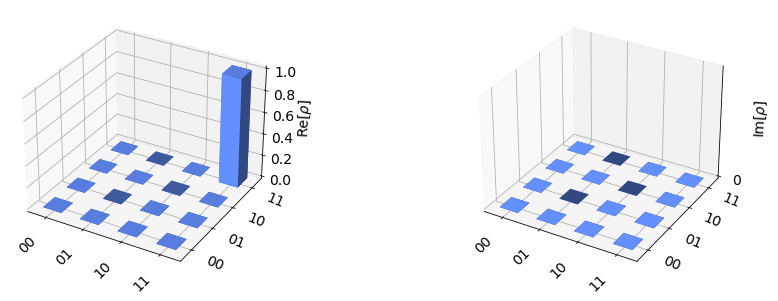

In [11]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit 
job_state = execute(qc_cz, simulator_state)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc_cz)
print("\nQuantum state is:",psi)

# Plot a Density Matrix Plot
plot_state_city(psi)

### QSphere Plot for CZ Gate

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


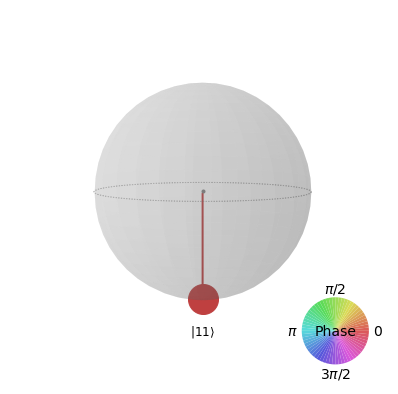

In [12]:
# Plot the QSphere
psi  = result_state.get_statevector(qc_cz)
plot_state_qsphere(psi)

### Unitary Operator for CZ Gate

In [13]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
cz_unitary = execute(qc_cz, backend)
cz_unitary.result().get_unitary(qc_cz, decimals=3)

array([[ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j]])

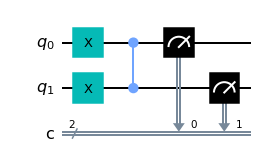

In [14]:
# CZ-gate with measurement
qc_cz = QuantumCircuit(2,2,name="qc")
qc_cz.x(0) # X Gate on 1st Qubit
qc_cz.x(1) # X Gate on 2nd Qubit
qc_cz.cz(0,1) # CZ Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cz.measure([0,1],[0,1])
qc_cz.draw('mpl')

### Running CZ Gate Circuit using QASM Simulator


Total counts are: {'11': 1000}


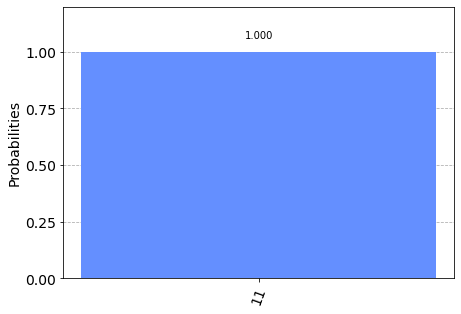

In [15]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_cz, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_cz)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## CZ Gate using CNOT and H Gates

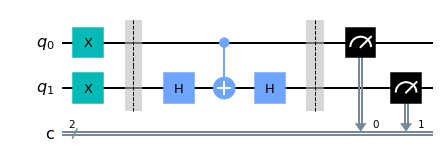

In [16]:
# CZ-gate with measurement
qc_cz = QuantumCircuit(2,2,name="qc")
qc_cz.x(0) # X Gate on 1st Qubit
qc_cz.x(1) # X Gate on 2nd Qubit
qc_cz.barrier()
qc_cz.h(1) # H Gate on 2nd Qubit
qc_cz.cx(0,1) # CNOT Gate
qc_cz.h(1) # H Gate on 2nd Qubit
qc_cz.barrier()
qc_cz.measure([0,1],[0,1])
qc_cz.draw('mpl')


Total counts are: {'11': 1000}


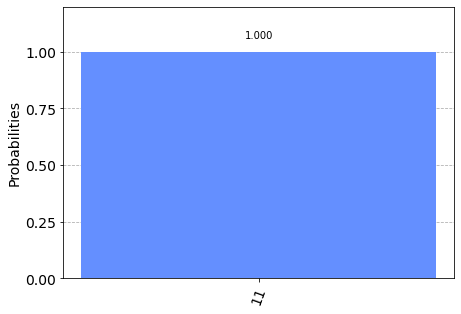

In [17]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_cz, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_cz)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Quantum CH Gate

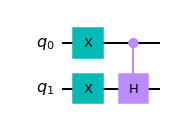

In [18]:
# CH-gate on |11> 
qc_ch = QuantumCircuit(2,name="qc")
qc_ch.x(0) # X Gate on 1st Qubit
qc_ch.x(1) # X Gate on 2nd Qubit
qc_ch.ch(0,1) # CH Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_ch.draw('mpl')

### Density Plot for CH Gate


Quantum state is: [ 0.        +0.j  0.70710678+0.j  0.        +0.j -0.70710678+0.j]


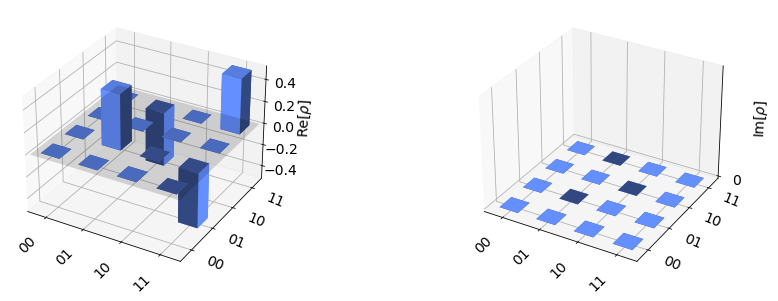

In [19]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit 
job_state = execute(qc_ch, simulator_state)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc_ch)
print("\nQuantum state is:",psi)

# Plot a Density Matrix Plot
plot_state_city(psi)

### QSphere Plot for CH Gate

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


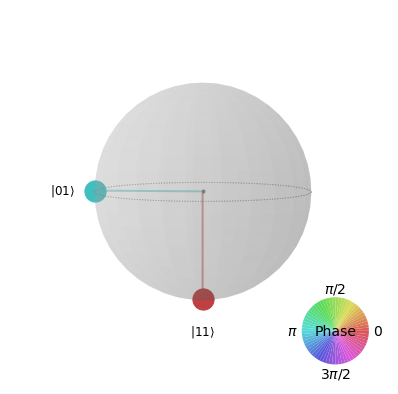

In [20]:
# Plot the QSphere
psi  = result_state.get_statevector(qc_ch)
plot_state_qsphere(psi)

### Unitary Operator for CH Gate

In [21]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
ch_unitary = execute(qc_ch, backend)
ch_unitary.result().get_unitary(qc_ch, decimals=3)

array([[ 0.   +0.j,  0.   +0.j,  0.   +0.j,  1.   -0.j],
       [ 0.707+0.j,  0.   +0.j,  0.707-0.j,  0.   +0.j],
       [ 0.   +0.j,  1.   +0.j,  0.   +0.j, -0.   +0.j],
       [-0.707+0.j,  0.   +0.j,  0.707-0.j,  0.   +0.j]])

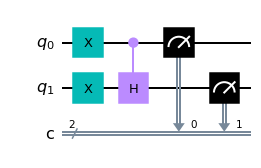

In [22]:
# CH-gate on |11> 
qc_ch = QuantumCircuit(2,2,name="qc")
qc_ch.x(0) # X Gate on 1st Qubit
qc_ch.x(1) # X Gate on 2nd Qubit
qc_ch.ch(0,1) # CH Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_ch.measure([0,1],[0,1])
qc_ch.draw('mpl')

### Running CH Gate Circuit using QASM Simulator


Total counts are: {'11': 504, '01': 496}


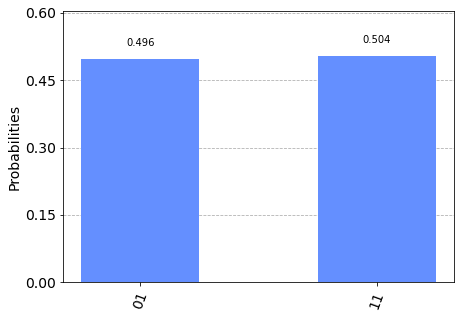

In [23]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_ch, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_ch)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## CH Gate using CNOT & Ry Gates

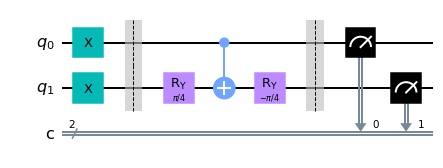

In [24]:
# CH-gate on |11> 
qc_ch = QuantumCircuit(2,2,name="qc")
qc_ch.x(0) # X Gate on 1st Qubit
qc_ch.x(1) # X Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.ry(pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.cx(0,1) # CNOT Gate
qc_ch.ry(-pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.measure([0,1],[0,1])
qc_ch.draw('mpl')


Total counts are: {'01': 479, '11': 521}


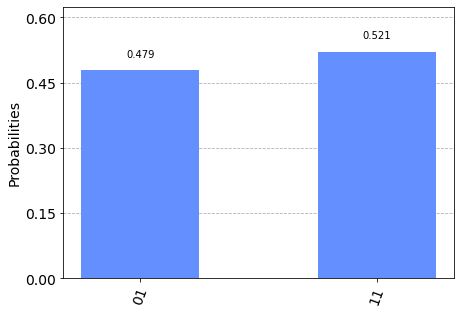

In [25]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_ch, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_ch)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Quantum SWAP Gate

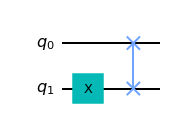

In [26]:
# SWAP Gate on |01> = |10> (|01> in Qiskit Ordering)
qc_sw = QuantumCircuit(2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.swap(0,1) # SWAP Gate Operation
qc_sw.draw(output='mpl')

### Density Plot for SWAP Gate


Quantum state is: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


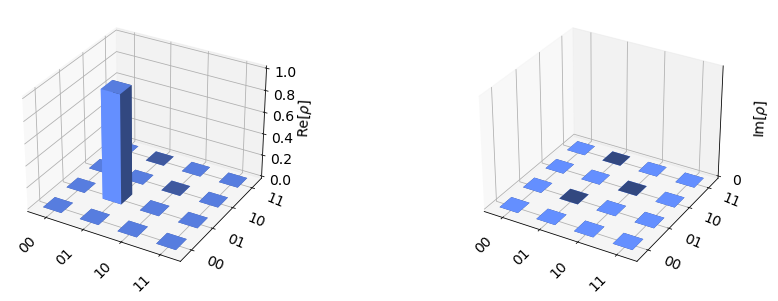

In [27]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit 
job_state = execute(qc_sw, simulator_state)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc_sw)
print("\nQuantum state is:",psi)

# Plot a Density Matrix Plot
plot_state_city(psi)

### QSphere Plot for SWAP Gate

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


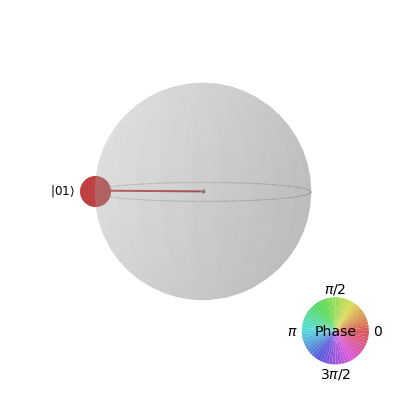

In [28]:
# Plot the QSphere
psi  = result_state.get_statevector(qc_sw)
plot_state_qsphere(psi)

### Unitary Operator for SWAP Gate

In [29]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
sw_unitary = execute(qc_sw, backend)
sw_unitary.result().get_unitary(qc_sw, decimals=3)

array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

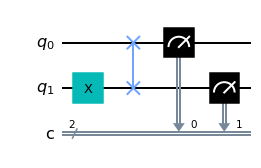

In [30]:
# SWAP Gate on |01> = |10> (|01> in Qiskit Ordering)
qc_sw = QuantumCircuit(2,2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.swap(0,1) # SWAP Gate Operation
qc_sw.measure([0,1],[0,1])
qc_sw.draw(output='mpl')

### Running SWAP Gate Circuit using QASM Simulator


Total counts are: {'01': 1000}


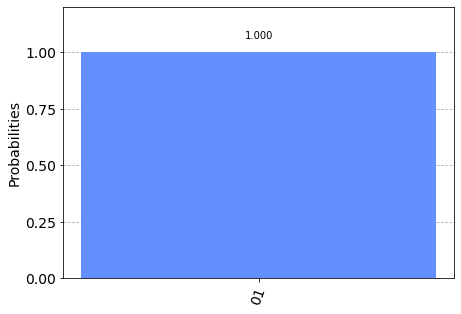

In [31]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_sw, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_sw)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## SWAP Gate using CNOT Gates - 1st Method

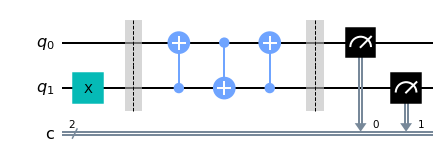

In [32]:
# SWAP Gate using CNOT - 1st Method
qc_sw = QuantumCircuit(2,2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.barrier()
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as Control
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as Control
qc_sw.barrier()
qc_sw.measure([0,1], [0,1])
qc_sw.draw(output='mpl')


Total counts are: {'01': 1000}


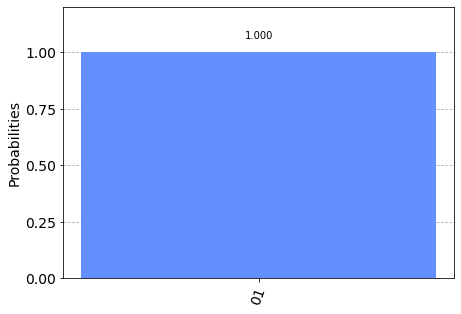

In [33]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_sw, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_sw)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## SWAP Gate using CNOT Gates - 2nd Method

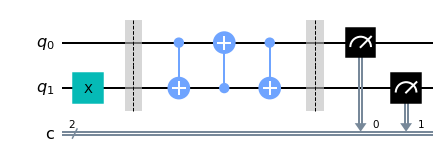

In [34]:
# SWAP Gate using CNOT - 2nd Method
qc_sw = QuantumCircuit(2,2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.barrier()
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.cx(1,0) # CNOT with 1st as Target and 2nd as Control
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.barrier()
qc_sw.measure([0,1],[0,1])
qc_sw.draw(output='mpl')


Total counts are: {'01': 1000}


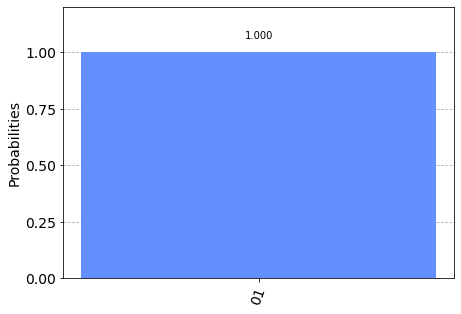

In [35]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_sw, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_sw)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## The Bell State

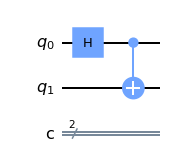

In [36]:
# The Bell State
qc_bell = QuantumCircuit(2,2,name="qc")
qc_bell.h(0) # H Gate on 1st Qubit
qc_bell.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_bell.draw(output='mpl')

### Density Matrix Plot for the Bell State


Quantum state is: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


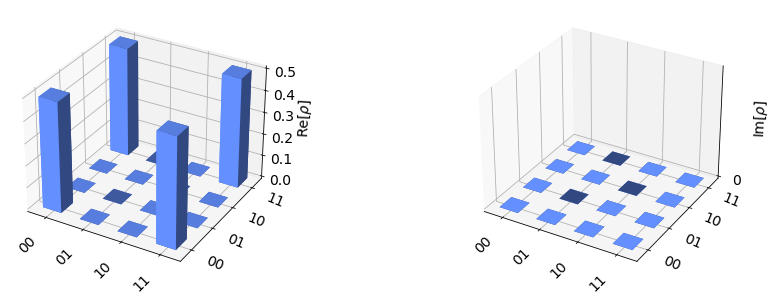

In [37]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit 
job_state = execute(qc_bell, simulator_state)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc_bell)
print("\nQuantum state is:",psi)

# Plot a Density Matrix Plot
plot_state_city(psi)

### QSphere Plot for the Bell State

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


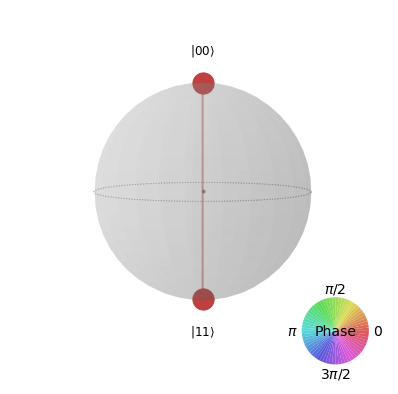

In [38]:
# Plot the QSphere
psi  = result_state.get_statevector(qc_bell)
plot_state_qsphere(psi)

### Unitary Operator for the Bell State

In [39]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
bell_unitary = execute(qc_bell, backend)
bell_unitary.result().get_unitary(qc_bell, decimals=3)

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]])

### Running the Bell State Circuit on QASM Simulator

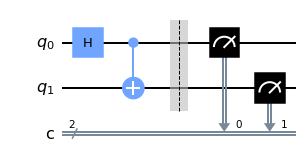

In [40]:
# The Bell State
qc_bell = QuantumCircuit(2,2,name="qc")
qc_bell.h(0) # H Gate on 1st Qubit
qc_bell.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_bell.barrier()
qc_bell.measure([0,1],[0,1])
qc_bell.draw(output='mpl')


Total counts are: {'11': 489, '00': 511}


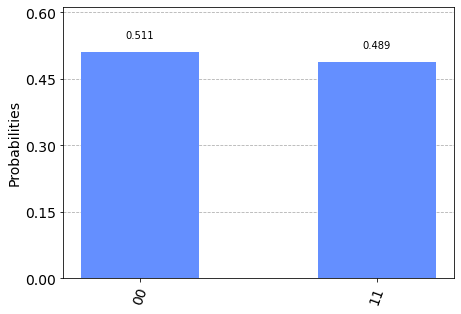

In [41]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_bell, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_bell)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Quantum CCX/CCNOT or Toffoli Gate

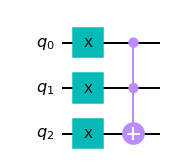

In [42]:
# CCX-gate on |111> = |110> (|011> in Qiskit ordering)
qc_ccx = QuantumCircuit(3,name="qc")
qc_ccx.x(0) # X Gate on 1st Qubit
qc_ccx.x(1) # X Gate on 2nd Qubit
qc_ccx.x(2) # X Gate on 3rd Qubit
qc_ccx.ccx(0,1,2) # CCX Gate with 1st two qubits as control and 3rd as target
qc_ccx.draw(output='mpl')

### Density Matrix Plot for CCX Gate


Quantum state is: [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


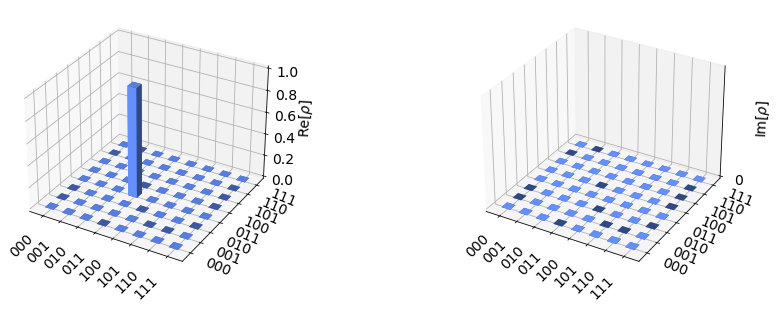

In [43]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc_ccx, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc_ccx)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

### QSphere Plot for CCX Gate

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


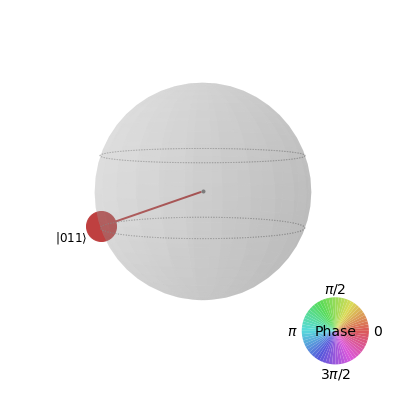

In [44]:
# Plot the QSphere
psi  = result_state.get_statevector(qc_ccx)
plot_state_qsphere(psi)

### Unitary Operator for CCX Gate

In [45]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
ccx_unitary = execute(qc_ccx, backend)
ccx_unitary.result().get_unitary(qc_ccx, decimals=3)

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

### Running the CCX Gate Circuit using QASM Simulator 

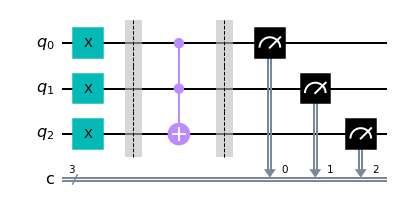

In [46]:
# CCX-gate on |111> = |110> (|011> in Qiskit ordering)
qc_ccx = QuantumCircuit(3,3,name="qc")
qc_ccx.x(0) # X Gate on 1st Qubit
qc_ccx.x(1) # X Gate on 2nd Qubit
qc_ccx.x(2) # X Gate on 3rd Qubit
qc_ccx.barrier()
qc_ccx.ccx(0,1,2) # CCX Gate with 1st two qubits as control and 3rd as target
qc_ccx.barrier()
qc_ccx.measure([0,1,2],[0,1,2])
qc_ccx.draw(output='mpl')


Total counts are: {'011': 1000}


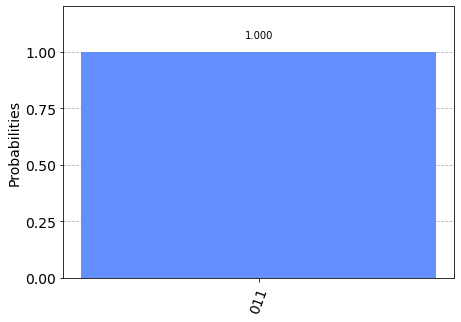

In [47]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_ccx, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_ccx)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Quantum CSWAP Gate or Fredkin Gate

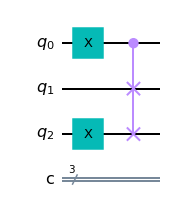

In [48]:
# CSWAP Gate on |101> = |110> (|011> in Qiskit Ordering)
qc_csw = QuantumCircuit(3,3,name="qc")
qc_csw.x(0) # X Gate on 1st Qubit
qc_csw.x(2) # X Gate on 3rd Qubit
qc_csw.cswap(0,1,2) # CSWAP Gate with 1st qubit as control and 2nd & 3rd being swapped
qc_csw.draw(output='mpl')

### Density Matrix Plot for CSWAP Gate


Quantum state is: [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


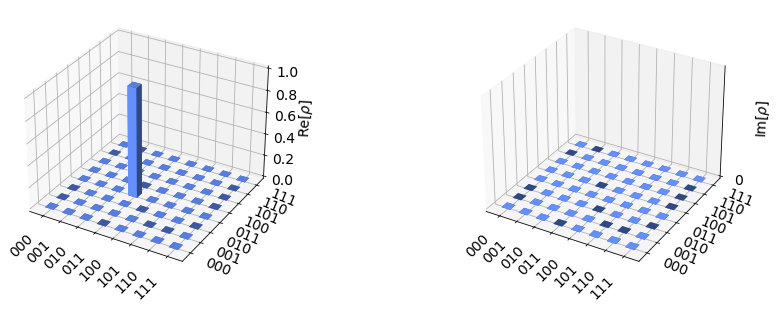

In [49]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc_csw, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc_csw)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

### QSphere Plot for CSWAP Gate

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


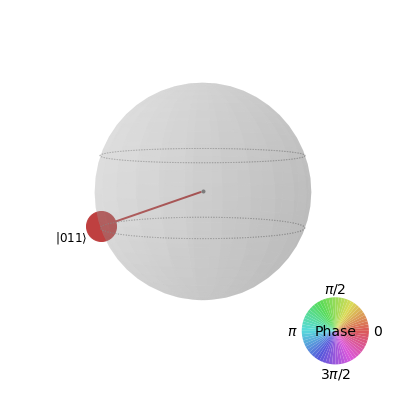

In [50]:
# Plot the QSphere
psi  = result_state.get_statevector(qc_csw)
plot_state_qsphere(psi)

### Unitary Operator for CSWAP Gate

In [51]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
csw_unitary = execute(qc_csw, backend)
csw_unitary.result().get_unitary(qc_csw, decimals=3)

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

### Running the CSWAP Gate Circuit using QASM Simulator

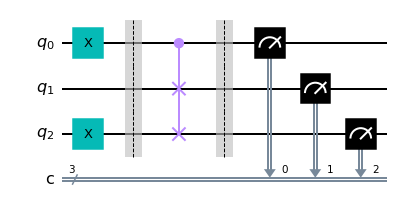

In [52]:
# CSWAP Gate on |101> = |110> (|011> in Qiskit Ordering)
qc_csw = QuantumCircuit(3,3,name="qc")
qc_csw.x(0) # X Gate on 1st Qubit
qc_csw.x(2) # X Gate on 3rd Qubit
qc_csw.barrier()
qc_csw.cswap(0,1,2) # CSWAP Gate with 1st qubit as control and 2nd & 3rd being swapped
qc_csw.barrier()
qc_csw.measure([0,1,2],[0,1,2])
qc_csw.draw(output='mpl')


Total counts are: {'011': 1000}


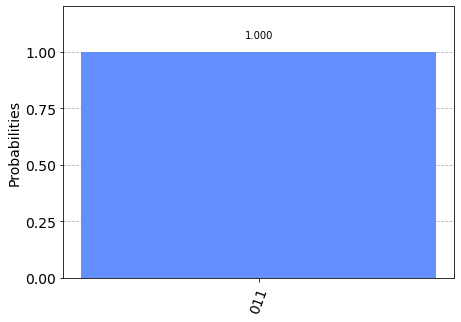

In [53]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_csw, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_csw)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)